In [1]:
import pandas as pd
data_path = "kmrd-small/"

In [2]:
castings = pd.read_csv(f"{data_path}/castings.csv")
countries = pd.read_csv(f"{data_path}/countries.csv")
genres = pd.read_csv(f"{data_path}/genres.csv")
ratings = pd.read_csv(f"{data_path}/rates.csv")

movies = pd.read_csv(f"{data_path}/movies.txt", sep='\t')
peoples = pd.read_csv(f"{data_path}/peoples.txt", sep='\t')


In [3]:
castings.info()
print("castings info\n")
countries.info()
print("countries info\n")
genres.info()
print("genres info\n")
ratings.info()
print("ratings info\n")
movies.info()
print("movies info\n")
peoples.info()
print("peoples info\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9776 entries, 0 to 9775
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   movie    9776 non-null   int64
 1   people   9776 non-null   int64
 2   order    9776 non-null   int64
 3   leading  9776 non-null   int64
dtypes: int64(4)
memory usage: 305.6 KB
castings info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movie    1109 non-null   int64 
 1   country  1109 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.5+ KB
countries info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   movie   2025 non-null   int64 
 1   genre   2025 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.8+ KB
g

In [4]:
print(movies.isnull().sum())
print(peoples.isnull().sum())

movie          0
title          7
title_eng      8
year         390
grade         42
dtype: int64
people        0
korean        0
original    867
dtype: int64


- movies
	- title은 992개 Non-Null → 7개 결측치
	- title_eng는 991개 Non-Null → 8개 결측치
	- year는 609개 Non-Null → 390개 결측치
	- grade는 957개 Non-Null → 42개 결측치
- peoples
	- original은 6305개 Non-Null → 867개 결측치

In [5]:
# movies, peoples 데이터에 결측치 발생 확인
missing_title = movies['year'].isnull()
missing_title_rows = movies[missing_title]
missing_title_rows

,movie,title,title_eng,year,grade
9,10010,슈퍼맨 3,"Superman III , 1983",NaN,전체 관람가
30,10031,죠스 3,"Jaws 3-D , 1983",NaN,15세 관람가
31,10032,죠스 4,"Jaws: The Revenge , 1987",NaN,PG-13
50,10051,싸이코 2,"Psycho II , 1983",NaN,청소년 관람불가
51,10052,싸이코 3,"Psycho III , 1986",NaN,청소년 관람불가
...,...,...,...,...,...
992,10993,톰 혼,"Tom Horn , 1980",NaN,R
994,10995,공포의 여정,"Journey Into Fear , 1975",NaN,PG
995,10996,버스틴 루즈,"Bustin' Loose , 1981",NaN,R
996,10997,블랙 엔젤,"Mausoleum , 1983",NaN,청소년 관람불가


In [6]:
# IQR 계산
Q1 = ratings['rate'].quantile(0.25)
Q3 = ratings['rate'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 기준
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'lower_bound is {lower_bound}')
print(f'upper_bound is {upper_bound}')

# 이상치 탐지
outliers = ratings[(ratings['rate'] < lower_bound) | (ratings['rate'] > upper_bound)]
print("Outliers:\n", outliers)

lower_bound is 7.5
upper_bound is 11.5
Outliers:
          user  movie  rate        time
0           0  10003     7  1494128040
1           0  10004     7  1467529800
4           0  10022     7  1427627340
5           0  10023     7  1428738480
6           0  10024     4  1429359420
...       ...    ...   ...         ...
140667  51985  10983     1  1270835220
140672  51990  10985     2  1525411980
140676  51994  10988     5  1356811920
140701  52019  10998     3  1472397240
140707  52025  10998     7  1498546920

[20101 rows x 4 columns]


In [7]:
from scipy.stats import zscore

# Z-Score 계산
ratings['rate_zscore'] = zscore(ratings['rate'])

# 이상치 탐지
outliers = ratings[(ratings['rate_zscore'] > 3) | (ratings['rate_zscore'] < -3)]
print("Outliers using Z-Score:\n", outliers)


Outliers using Z-Score:
          user  movie  rate        time  rate_zscore
207         4  10111     1  1478864100    -3.776405
208         4  10112     1  1479086940    -3.776405
219         4  10153     2  1494030540    -3.301580
225         4  10232     2  1552023420    -3.301580
326        13  10016     1  1255108920    -3.776405
...       ...    ...   ...         ...          ...
140545  51863  10979     1  1568964540    -3.776405
140605  51923  10980     1  1363948320    -3.776405
140661  51979  10983     1  1267666680    -3.776405
140667  51985  10983     1  1270835220    -3.776405
140672  51990  10985     2  1525411980    -3.301580

[5970 rows x 5 columns]


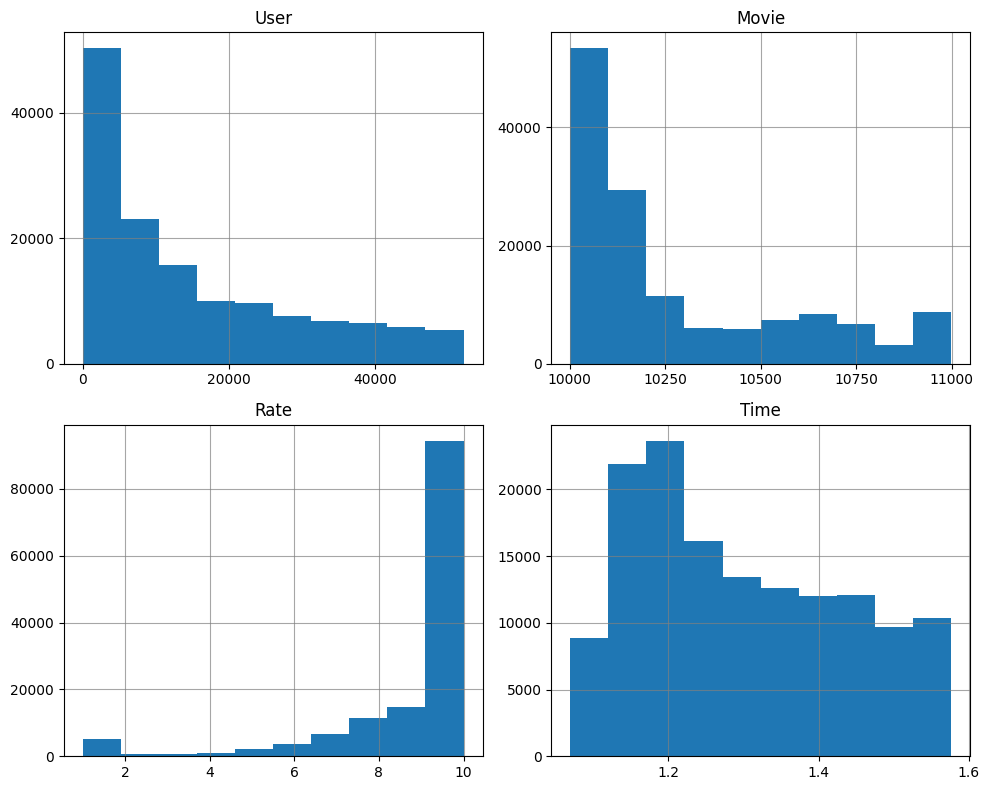

In [8]:
import matplotlib.pyplot as plt

# time 데이터 변환
ratings['time_scaled'] = ratings['time'] / 1e9

# Subplots 생성
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# User 히스토그램
axs[0, 0].hist(ratings['user'], bins=10 )
axs[0, 0].set_title("User")
axs[0, 0].set_xticks(range(0, 40001, 20000))
axs[0, 0].set_yticks(range(0, 40001, 20000))
axs[0, 0].grid(axis='x', color='gray', linestyle='-', alpha=0.7)
axs[0, 0].grid(axis='y', color='gray', linestyle='-', alpha=0.7)


# Movie 히스토그램
axs[0, 1].hist(ratings['movie'], bins=10 )
axs[0, 1].set_title("Movie")
axs[0, 1].set_xticks(range(10000, 11001, 250))
axs[0, 1].set_yticks(range(0, 40001, 20000))
axs[0, 1].grid(axis='x', color='gray', linestyle='-', alpha=0.7)
axs[0, 1].grid(axis='y', color='gray', linestyle='-', alpha=0.7)

# Rate 히스토그램
axs[1, 0].hist(ratings['rate'], bins=10 )
axs[1, 0].set_title("Rate")
axs[1, 0].set_xticks(range(2, 11, 2))
axs[1, 0].set_yticks(range(0, 80001, 20000))
axs[1, 0].grid(axis='x', color='gray', linestyle='-', alpha=0.7)
axs[1, 0].grid(axis='y', color='gray', linestyle='-', alpha=0.7)

# Time 히스토그램
axs[1, 1].hist(ratings['time_scaled'], bins=10 )
axs[1, 1].set_title("Time")
axs[1, 1].set_xticks([1.2, 1.4, 1.6])
axs[1, 1].set_yticks(range(0, 20001, 5000))
axs[1, 1].grid(axis='x', color='gray', linestyle='-', alpha=0.7)
axs[1, 1].grid(axis='y', color='gray', linestyle='-', alpha=0.7)

# 레이아웃 정리
plt.tight_layout()
plt.show()

In [9]:
# 가장 많이 평가된 영화
# 영화별 평가 수 계산
most_rated_movies = ratings.groupby('movie')['rate'].count().reset_index()
most_rated_movies.columns = ['movie', 'rating_count']

# 평가 수 기준으로 정렬
most_rated_movies = most_rated_movies.sort_values(by='rating_count', ascending=False)

# 영화 제목 추가 (movies 데이터와 병합)
most_rated_movies_with_titles = pd.merge(most_rated_movies, movies[['movie', 'title']], on='movie', how='left')

# 가장 많이 평가된 영화 하나 출력
most_rated_movie = most_rated_movies_with_titles.iloc[0]
print(most_rated_movie)


movie                  10200
rating_count            7265
title           터미네이터 2:오리지널
Name: 0, dtype: object


In [10]:
# 가장 높은 평균 평점을 받은 영화
highest_rated_movies = ratings.groupby('movie')['rate'].mean().reset_index()
highest_rated_movies.columns = ['movie', 'average_rating']

highest_rated_movies = highest_rated_movies.sort_values(by='average_rating', ascending=False)

# 영화 제목 추가
highest_rated_movies_with_titles = pd.merge(highest_rated_movies, movies[['movie', 'title']], on='movie', how='left')
highest_rated_movies = highest_rated_movies_with_titles.iloc[0]
print(highest_rated_movies)

movie             10974
average_rating     10.0
title               쥬리아
Name: 0, dtype: object
